<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardiovascular Risk Prediction**

# **BUSINESS CONTEXT**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

## **STEP 1 - Importing necessary libraries**

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **STEP 2 - Import and overview of the data**

In [42]:
# let's take a look at the dataset
crp_df = pd.read_csv('/content/drive/MyDrive/capstone project 3/Copy of data_cardiovascular_risk.csv')
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# **Column Details**


*   Sex - Gender of the patient
*   Age -  Age of the patient

*   Is_smoking - Whether the patient is smoking currently or not
*   CigsPerDay - Number of ciggrettes smoked per day

*   BPMeds - Whether patient is taking BP meds or not
*   PrevalentStroke - If the patient has a prior history of stroke

*   PrevalentHyp - If the patient has a history of hypertension
*   Diabetes - Patient has Diabetes or not

*   TotChol - Cholestrol Measure of patient
*   SysBP - Systolic blood pressure 

*   DiaBP - Diastolic blood pressure
*   BMI - Body mass index

*   Heartrate -  Heart beats per min
*   Glucose - Glucose level in body

*   TenYearCHD - 10 year risk of future coronary hear disease


















In [43]:
# Determining shape of the dataset
rows=crp_df.shape[0]
columns=crp_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 3390
Number of columns in dataset are 17


In [44]:
# Digging more into data
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [45]:
# More about numerical columns in our data
crp_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## **STEP 3 - Dealing with null values.**

In [46]:
# Defining function to determine null values in dataset and datatype of the data
def brief():
  values=pd.DataFrame(index=crp_df.columns)
  values['Null Count']= crp_df.isnull().sum()
  values['Dtype']=crp_df.dtypes
  values['unique_count']= crp_df.nunique()
  return values 

In [47]:
brief()

,Null Count,Dtype,unique_count
id,0,int64,3390
age,0,int64,39
education,87,float64,4
sex,0,object,2
is_smoking,0,object,2
cigsPerDay,22,float64,32
BPMeds,44,float64,2
prevalentStroke,0,int64,2
prevalentHyp,0,int64,2
diabetes,0,int64,2


### Inference - Education, cigs_per_day, BPmeds, totchol, BMI, heartrate, glucose have null values.

### As we have a very small dataset and we have a lot of null values, removing null value will remove a large chunk of data. Therefore we have to replace these null values.

### We will be using median of that column to replace null values because mean is affected by outliers but median is not affected by outliers.

In [48]:
# Replacing null values with median continuos data type 
crp_df['cigsPerDay'] = crp_df['cigsPerDay'].fillna(crp_df['cigsPerDay'].median())
crp_df['totChol'] = crp_df['totChol'].fillna(crp_df['totChol'].median())
crp_df['BMI'] = crp_df['BMI'].fillna(crp_df['BMI'].median())
crp_df['heartRate'] = crp_df['heartRate'].fillna(crp_df['heartRate'].median())
crp_df['glucose'] = crp_df['glucose'].fillna(crp_df['glucose'].median())

In [49]:
# Replacing null values with mode for 
crp_df['education'] = crp_df['education'].fillna(crp_df['education'].mode()[0])
crp_df['BPMeds'] = crp_df['BPMeds'].fillna(crp_df['BPMeds'].mode()[0])

In [50]:
# Lets check again for presence of null values
brief()

,Null Count,Dtype,unique_count
id,0,int64,3390
age,0,int64,39
education,0,float64,4
sex,0,object,2
is_smoking,0,object,2
cigsPerDay,0,float64,32
BPMeds,0,float64,2
prevalentStroke,0,int64,2
prevalentHyp,0,int64,2
diabetes,0,int64,2


### Finally we are free from null values.

# **STEP 5 - Explaratory Analysis**

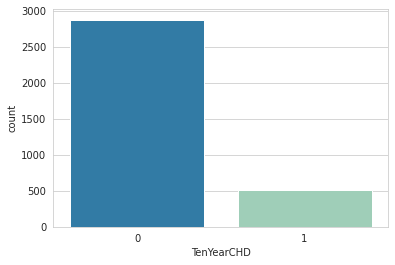

In [51]:
# target/dependent variable distribution
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', data=crp_df, palette='YlGnBu_r')

### Inference - The above distribution clearly shows that number of people having cardiovascular risk are very less.


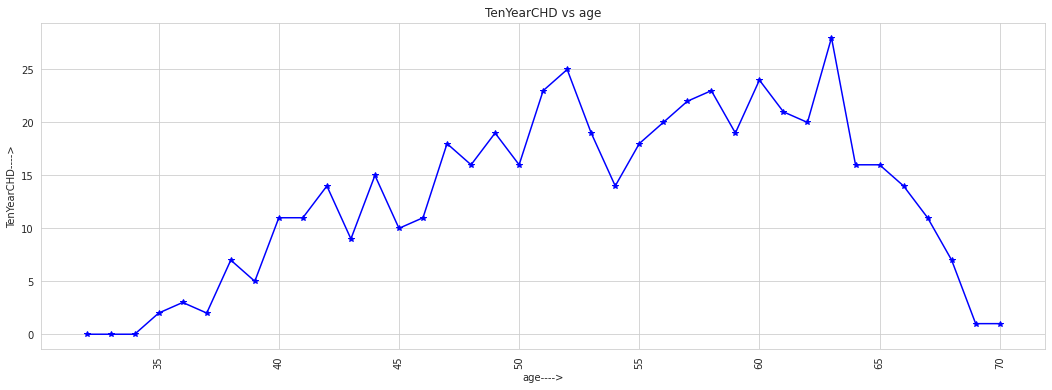

In [52]:
# Relatioship between age and risk 
x = crp_df.groupby('age')['TenYearCHD'].agg(np.sum)

plt.figure(figsize=(18,6))
plt.plot(x ,  color='blue', marker='*')
plt.xticks(rotation=90)
plt.xlabel('age---->')
plt.ylabel('TenYearCHD---->')
plt.title('TenYearCHD vs age')
plt.show()

### Inference - As we can observe with increasing age cardiovascular risk also increases, peak is observed between 60-65 years of age.

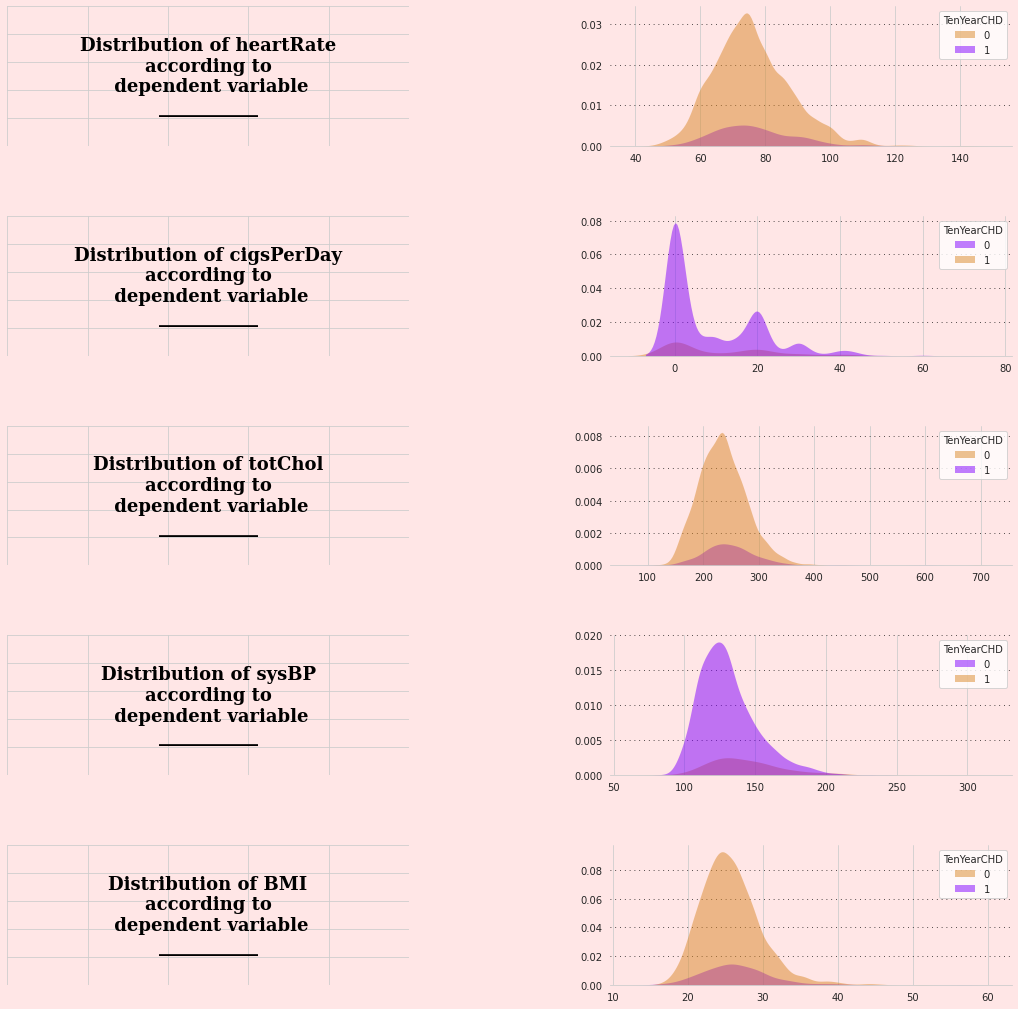

In [53]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# heartRate title
ax0.text(0.5,0.5,"Distribution of heartRate\naccording to\n dependent variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# heartRate
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=crp_df, x='heartRate',hue="TenYearCHD", fill=True,palette=["#da8829","#8000ff"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")
  
# cigsPerDay title
ax2.text(0.5,0.5,"Distribution of cigsPerDay\naccording to\n dependent variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# cigsPerDay
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=crp_df, x='cigsPerDay',hue="TenYearCHD", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# totChol title
ax4.text(0.5,0.5,"Distribution of totChol\naccording to\n dependent variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# totChol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=crp_df, x='totChol',hue="TenYearCHD", fill=True,palette=["#da8829","#8000ff"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# sysBP title
ax6.text(0.5,0.5,"Distribution of sysBP\naccording to\n dependent variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# sysBP
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=crp_df, x='sysBP',hue="TenYearCHD", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# BMI title
ax8.text(0.5,0.5,"Distribution of BMI\naccording to\n dependent variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# BMI
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=crp_df, x='BMI',hue="TenYearCHD", fill=True,palette=["#da8829","#8000ff"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

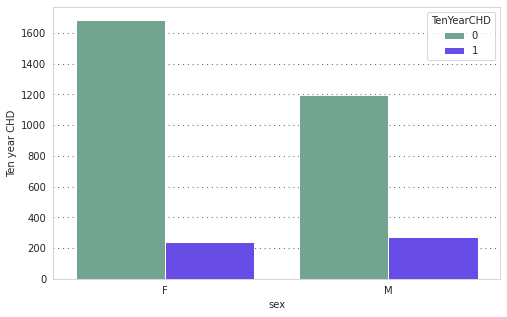

In [54]:
fig = plt.figure(figsize=(8,5))
sns.countplot(data=crp_df,x='sex',palette=["#6aac90","#5833ff"], hue='TenYearCHD')
plt.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xlabel("sex")
plt.ylabel("Ten year CHD")
plt.show()


# **STEP 4 - Outlier Removal**

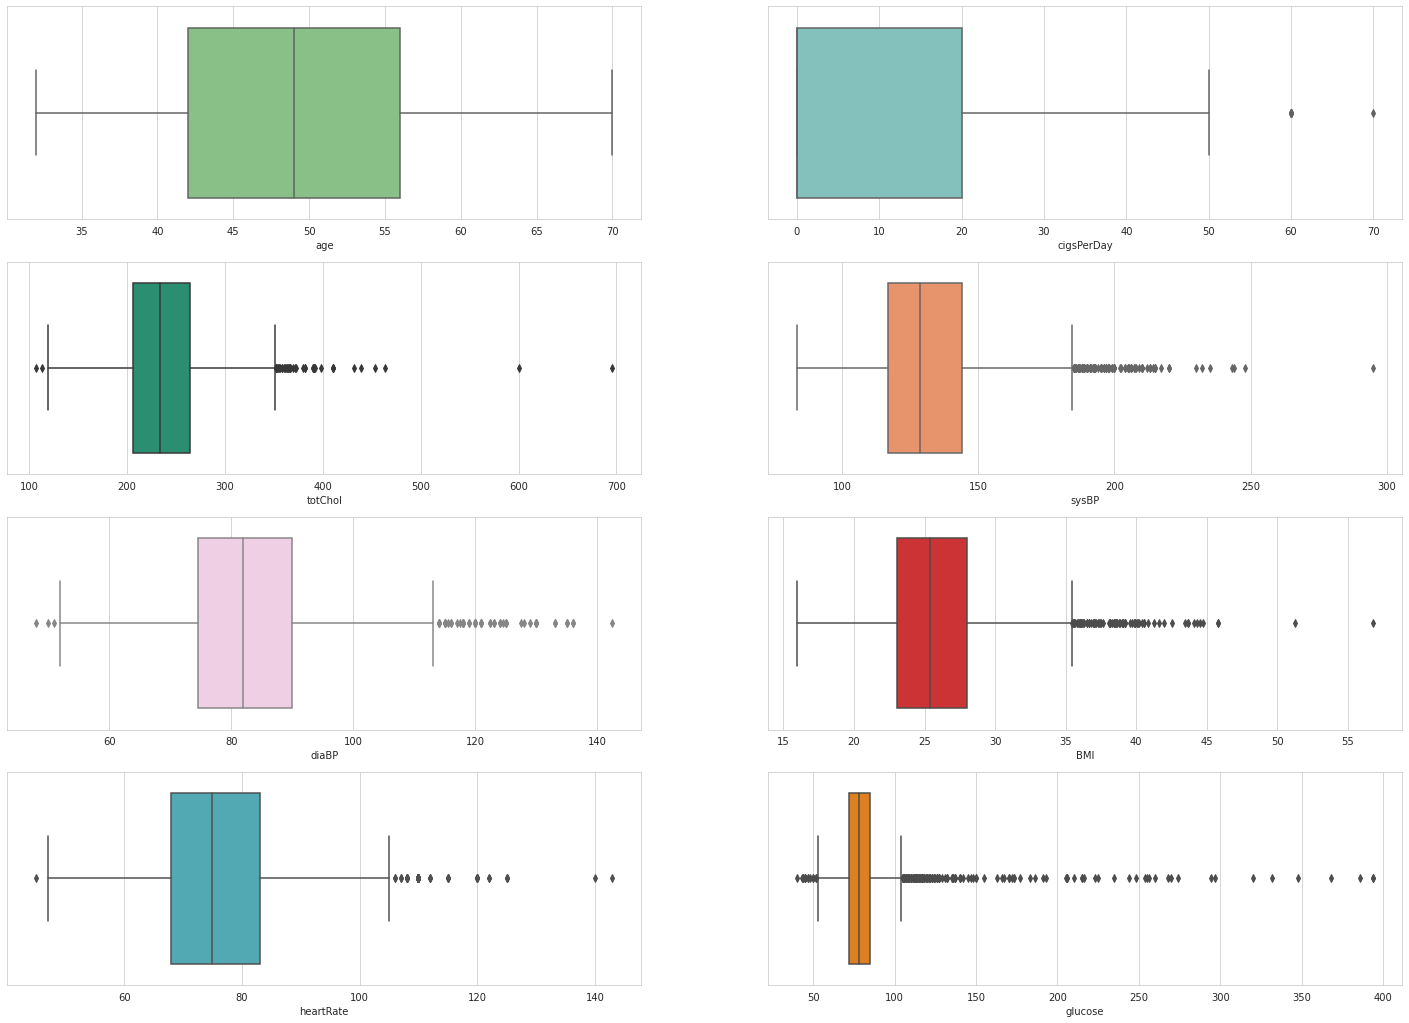

In [55]:
# Box plot for visualizing outliers
figure, ax = plt.subplots(nrows=4, ncols=2, figsize=(25,18))
sns.boxplot(crp_df['age'], palette='Accent', ax=ax[0,0])
sns.boxplot(crp_df['cigsPerDay'],palette='GnBu', ax=ax[0,1])
sns.boxplot(crp_df['totChol'],palette='Dark2', ax=ax[1,0])
sns.boxplot(crp_df['sysBP'], palette='OrRd',ax=ax[1,1])
sns.boxplot(crp_df['diaBP'], palette='Pastel2_r', ax=ax[2,0])
sns.boxplot(crp_df['BMI'],palette='Set1', ax=ax[2,1])
sns.boxplot(crp_df['heartRate'], palette='YlGnBu_r', ax=ax[3,0])
sns.boxplot(crp_df['glucose'],palette='autumn', ax=ax[3,1])

### Inference - As we can see that except Age column all other columns have a lot of outliers.

In [56]:
# We will be using quantile method for dealing with outliers
columns=['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
crp_df[columns] = crp_df[columns].apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))

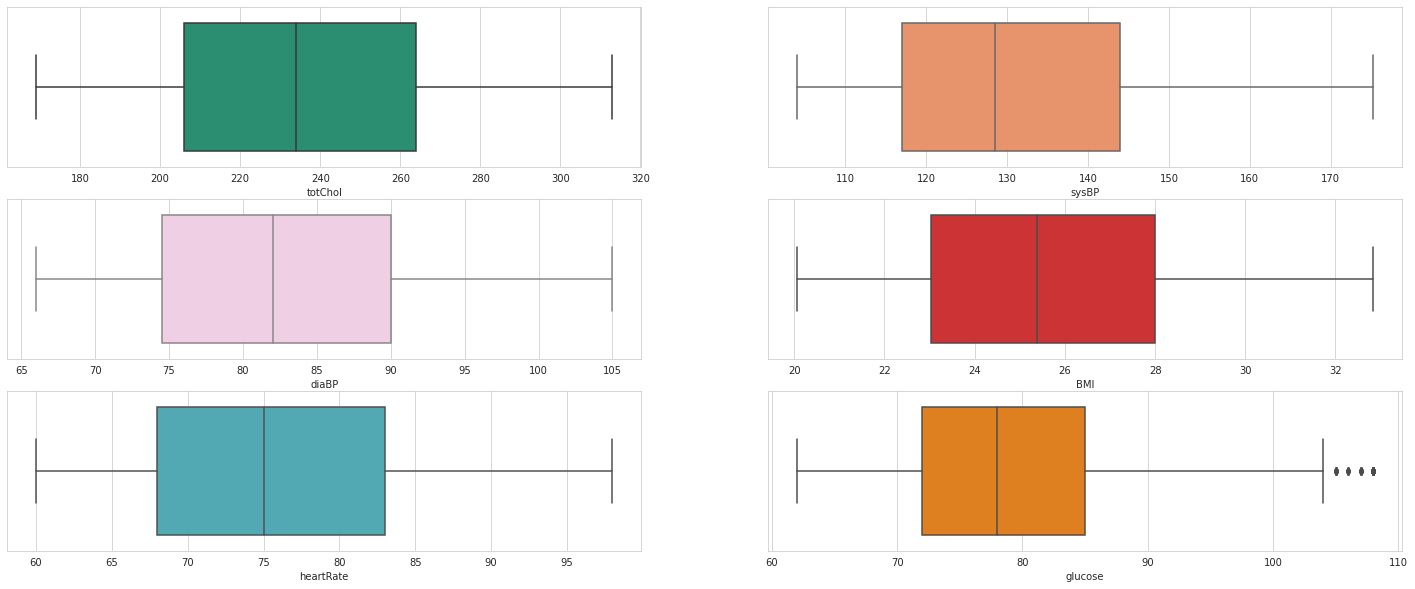

In [57]:
figure, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))
sns.boxplot(crp_df['totChol'],palette='Dark2', ax=ax[0,0])
sns.boxplot(crp_df['sysBP'], palette='OrRd',ax=ax[0,1])
sns.boxplot(crp_df['diaBP'], palette='Pastel2_r', ax=ax[1,0])
sns.boxplot(crp_df['BMI'],palette='Set1', ax=ax[1,1])
sns.boxplot(crp_df['heartRate'], palette='YlGnBu_r', ax=ax[2,0])
sns.boxplot(crp_df['glucose'],palette='autumn', ax=ax[2,1])